In [42]:
import pandas as pd 
import numpy as np 

# 1. 서울시 구별 CCTV와 인구수 시각화 
# 2. cctv.xlsx 파일과 pop.txt 파일의 내용 읽기

cctv = pd.read_excel('/Users/jw/python/4.Study/data/cctv.xlsx')
print(cctv)

기관명    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0     강 남 구  5221    1944.0  195.0  316.0    430    546    765    577    448
1     강 동 구  1879     303.0  387.0  134.0     59    144    194    273    385
2     강 북 구  1265     243.0   88.0  141.0     74    145    254      1    319
3     강 서 구  1617     219.0  155.0  118.0    230    187    190    264    254
4     관 악 구  3985     430.0   56.0  419.0    487    609    619    694    671
5     광 진 구  1581     470.0   42.0   83.0     87     64     21    468    346
6     구 로 구  3227     852.0  219.0  349.0    187    268    326    540    486
7     금 천 구  1634      27.0   17.0  242.0    101    382    136    199    530
8     노 원 구  1906     481.0  117.0  203.0     80    461    298    110    156
9     도 봉 구   858     197.0   66.0    8.0    185     59    155    117     71
10     동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197
11    동 작 구  1780     238.0   93.0   29.0    503    130    254    278    255
12    마

In [43]:
# read_csv 로 불러올때는 확장자명이 의미가 없다. txt 도 불러올수있다. 
# pop = pd.read_csv('/Users/jw/python/4.Study/data/pop.txt')
# print(pop) 

# 데이터를 까보자 txt파일
# 데이터가 , 가 아니라 tab 으로 구분되어있다. 
# 값들이 천단위기호가 붙어있다.
# 컬럼이 세줄이다. (두줄을 건너뛰어야된다) 

In [44]:
# delimiter='\t' 구분자는 탭 
# thouansds=',' 천단위 구분기호 ,
# skiprows=2 컬럼 두줄 건너뛰고 읽기

pop = pd.read_csv('/Users/jw/python/4.Study/data/pop.txt',
                    delimiter='\t',
                    skiprows=2,
                    thousands=',')
print(pop) 

기간   자치구       세대         계       남자       여자      계.1     남자.1  \
0   2019    합계  4327605  10010983  4877725  5133258  9729107  4744059   
1   2019   종로구    73947    161869    78215    83654   151290    73746   
2   2019    중구    62739    136488    66823    69665   126171    61910   
3   2019   용산구   110126    245185   119599   125586   228670   110356   
4   2019   성동구   135838    308979   150861   158118   300889   147273   
5   2019   광진구   164428    366972   176917   190055   351350   170262   
6   2019  동대문구   164191    363023   178490   184533   346194   172113   
7   2019   중랑구   181579    402024   199006   203018   397015   196959   
8   2019   성북구   192592    454744   219099   235645   442650   214437   
9   2019   강북구   144277    317695   154638   163057   313954   153235   
10  2019   도봉구   138508    335631   163961   171670   333362   163051   
11  2019   노원구   216966    537303   259810   277493   532905   257923   
12  2019   은평구   207681    484546   233360   251186   480

In [45]:
# cctv.xlsx 의 구이름이 한칸씩 띄어져 있다. 
# pop.tvt의 구이름이 두번째 부터있다.
# 3. 컬럼이름 수정하고 구이름을 동일한 형태로 만들기.

# inplace=True 가 설정되면 현재 데이터프레임에 적용하고 
# 이 옵션이 없으면 현재 데이터프레임을 복사해서 작업하고 
# return을 해준다. 
cctv.rename(columns={cctv.columns[0]:'구별'}, inplace=True)
pop.rename(columns={pop.columns[1]:'구별'}, inplace=True)

#cctv의 구별 데이터에서 공백을 전부 제거하기 
gu = [] 
for x in cctv['구별'] : 
    gu.append(x.replace(' ',''))
cctv['구별'] = gu
print(cctv['구별'])

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 구별, dtype: object


In [46]:
# 4. 불필요한 컬럼이나 열을 제거 

# 첫번째 방법 : pop에서 필요한 행과 열만 가져오기(기간, 구별, 계, 남자, 여자)
pop = pop[['기간', '구별', '계', '남자', '여자']]
print(pop)

기간    구별         계       남자       여자
0   2019    합계  10010983  4877725  5133258
1   2019   종로구    161869    78215    83654
2   2019    중구    136488    66823    69665
3   2019   용산구    245185   119599   125586
4   2019   성동구    308979   150861   158118
5   2019   광진구    366972   176917   190055
6   2019  동대문구    363023   178490   184533
7   2019   중랑구    402024   199006   203018
8   2019   성북구    454744   219099   235645
9   2019   강북구    317695   154638   163057
10  2019   도봉구    335631   163961   171670
11  2019   노원구    537303   259810   277493
12  2019   은평구    484546   233360   251186
13  2019  서대문구    323171   153215   169956
14  2019   마포구    385925   181303   204622
15  2019   양천구    462285   227019   235266
16  2019   강서구    598273   289691   308582
17  2019   구로구    439371   219602   219769
18  2019   금천구    251820   128954   122866
19  2019  영등포구    400986   200986   200000
20  2019   동작구    408912   197706   211206
21  2019   관악구    517334   259194   258140
22  2019   서초구   

In [47]:
# 두번째 방법 : 0번 행을 제거 
pop.drop([0], inplace=True)

# 여성비율이라는 새로운 컬럼을 추가 - 여자/계 * 100
pop['여성비율'] = pop['여자']/pop['계'] * 100
print(pop)

기간    구별       계      남자      여자       여성비율
1   2019   종로구  161869   78215   83654  51.680062
2   2019    중구  136488   66823   69665  51.041117
3   2019   용산구  245185  119599  125586  51.220915
4   2019   성동구  308979  150861  158118  51.174352
5   2019   광진구  366972  176917  190055  51.790055
6   2019  동대문구  363023  178490  184533  50.832316
7   2019   중랑구  402024  199006  203018  50.498975
8   2019   성북구  454744  219099  235645  51.819265
9   2019   강북구  317695  154638  163057  51.325013
10  2019   도봉구  335631  163961  171670  51.148434
11  2019   노원구  537303  259810  277493  51.645533
12  2019   은평구  484546  233360  251186  51.839454
13  2019  서대문구  323171  153215  169956  52.590115
14  2019   마포구  385925  181303  204622  53.021183
15  2019   양천구  462285  227019  235266  50.891982
16  2019   강서구  598273  289691  308582  51.578794
17  2019   구로구  439371  219602  219769  50.019004
18  2019   금천구  251820  128954  122866  48.791200
19  2019  영등포구  400986  200986  200000  49.877053
20  20

In [48]:
# 5. 두개의 데이터프레임 합치기 
# cctv와 pop를 합치기 - 기준은 구별로 

df=pd.merge(cctv, pop, on='구별')
print(df)

구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년  \
0    강남구  5221    1944.0  195.0  316.0    430    546    765    577    448   
1    강동구  1879     303.0  387.0  134.0     59    144    194    273    385   
2    강북구  1265     243.0   88.0  141.0     74    145    254      1    319   
3    강서구  1617     219.0  155.0  118.0    230    187    190    264    254   
4    관악구  3985     430.0   56.0  419.0    487    609    619    694    671   
5    광진구  1581     470.0   42.0   83.0     87     64     21    468    346   
6    구로구  3227     852.0  219.0  349.0    187    268    326    540    486   
7    금천구  1634      27.0   17.0  242.0    101    382    136    199    530   
8    노원구  1906     481.0  117.0  203.0     80    461    298    110    156   
9    도봉구   858     197.0   66.0    8.0    185     59    155    117     71   
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197   
11   동작구  1780     238.0   93.0   29.0    503    130    254    278    255   
12   

In [49]:
# 6. 합쳐진 데이터프레임에서 불필요한 컬럼 제거 
# 2011년 이전, 2012년, 2013년, 2014년, 2015년, 2016년, 2017년, 기간
# drop으로 지울때 주의 요망(그냥지우면 행이지워짐. 뒤에 옵션들을 잘 기억하자.)
df.drop(['2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '기간'], axis=1, inplace=True)
print(df)

구별    소계  2018년       계      남자      여자       여성비율
0    강남구  5221    448  550209  263345  286864  52.137279
1    강동구  1879    385  440390  217338  223052  50.648743
2    강북구  1265    319  317695  154638  163057  51.325013
3    강서구  1617    254  598273  289691  308582  51.578794
4    관악구  3985    671  517334  259194  258140  49.898132
5    광진구  1581    346  366972  176917  190055  51.790055
6    구로구  3227    486  439371  219602  219769  50.019004
7    금천구  1634    530  251820  128954  122866  48.791200
8    노원구  1906    156  537303  259810  277493  51.645533
9    도봉구   858     71  335631  163961  171670  51.148434
10  동대문구  2003    197  363023  178490  184533  50.832316
11   동작구  1780    255  408912  197706  211206  51.650722
12   마포구  1935    195  385925  181303  204622  53.021183
13  서대문구  2121    194  323171  153215  169956  52.590115
14   서초구  2835    396  435107  208181  226926  52.154068
15   성동구  2679    294  308979  150861  158118  51.174352
16   성북구  3003    643  454744  219099

In [50]:
# 7. 구별 컬럼을 인덱스로 설정
df.set_index('구별', inplace=True)
print(df)

소계  2018년       계      남자      여자       여성비율
구별                                                  
강남구   5221    448  550209  263345  286864  52.137279
강동구   1879    385  440390  217338  223052  50.648743
강북구   1265    319  317695  154638  163057  51.325013
강서구   1617    254  598273  289691  308582  51.578794
관악구   3985    671  517334  259194  258140  49.898132
광진구   1581    346  366972  176917  190055  51.790055
구로구   3227    486  439371  219602  219769  50.019004
금천구   1634    530  251820  128954  122866  48.791200
노원구   1906    156  537303  259810  277493  51.645533
도봉구    858     71  335631  163961  171670  51.148434
동대문구  2003    197  363023  178490  184533  50.832316
동작구   1780    255  408912  197706  211206  51.650722
마포구   1935    195  385925  181303  204622  53.021183
서대문구  2121    194  323171  153215  169956  52.590115
서초구   2835    396  435107  208181  226926  52.154068
성동구   2679    294  308979  150861  158118  51.174352
성북구   3003    643  454744  219099  235645  51.819265
송

In [51]:
# 8. 그래프 그리기 위한 패키지 
import matplotlib.pyplot as plt 

# 그래프에서 한글 처리를 위한 패키지 
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

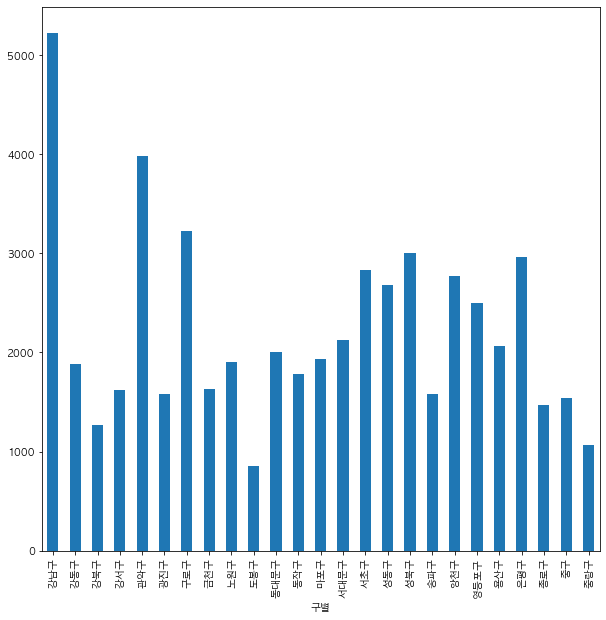

In [57]:
# cctv 개수를 가지고 막대 그래프 그리기 (kin=barh 로 하면 세로그래프)
df['소계'].plot(kind='bar', figsize=(10,10))
plt.show()

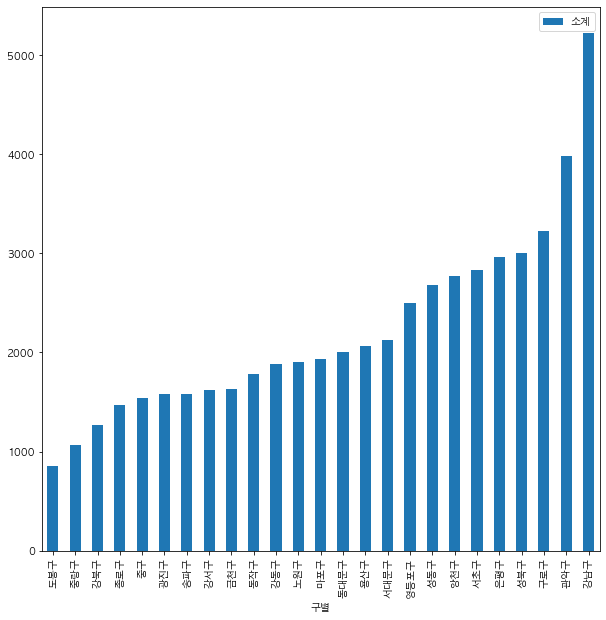

In [60]:
# 정렬을 해서 보이는 것도 나쁘진않다. 
df['소계'].sort_values().plot(kind='bar', figsize=(10,10))
plt.legend()
plt.show()

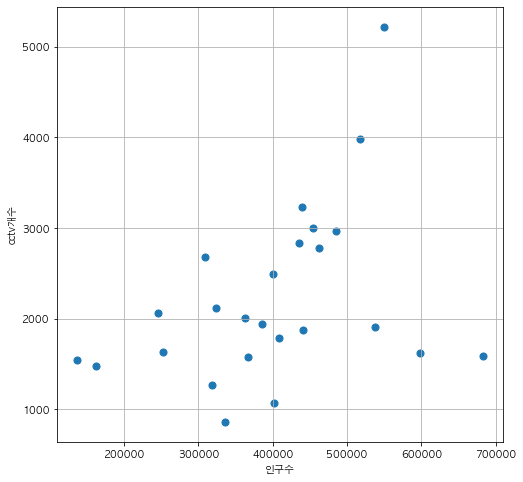

In [61]:
# 9.인구수(계)와 cctv개수(소계)를 가지고 산포도 그리기 
plt.figure(figsize=(8,8))
plt.scatter(df['계'], df['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('cctv개수')
plt.grid()
plt.show()

#회귀분석 할때는 이렇게 까지 쓸 필요없다

In [66]:
# 10. numpy의 polyfit 이라는 함수를 이용해서 다항식을 구해서 선 그래프 그리기

# 계와 소계의 데이터를 가지고 다항식 구하기 
# 뒤에 1은 1차다항식, 2는 2차다항식(숫자가 커지면 정확도가 올라가지만 계산이 오래걸림)
fp1 = np.polyfit(df['계'], df['소계'], 1)
f1 = np.poly1d(fp1)
print(f1)

# 출력값 : 0.002878 x + 1067 
# 출력값 : 기울기       절편 


0.002878 x + 1067


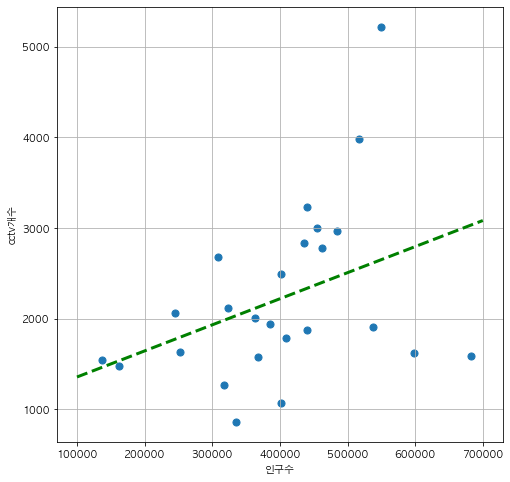

In [67]:
# 선그래프 그리기 
# (X축 인구수를보고)100000 부터 700000 까지를 100개로 분할한 배열을 생성 
fx = np.linspace(100000, 700000, 100)
plt.figure(figsize=(8,8))
plt.scatter(df['계'], df['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('cctv개수')
plt.grid()
plt.show()

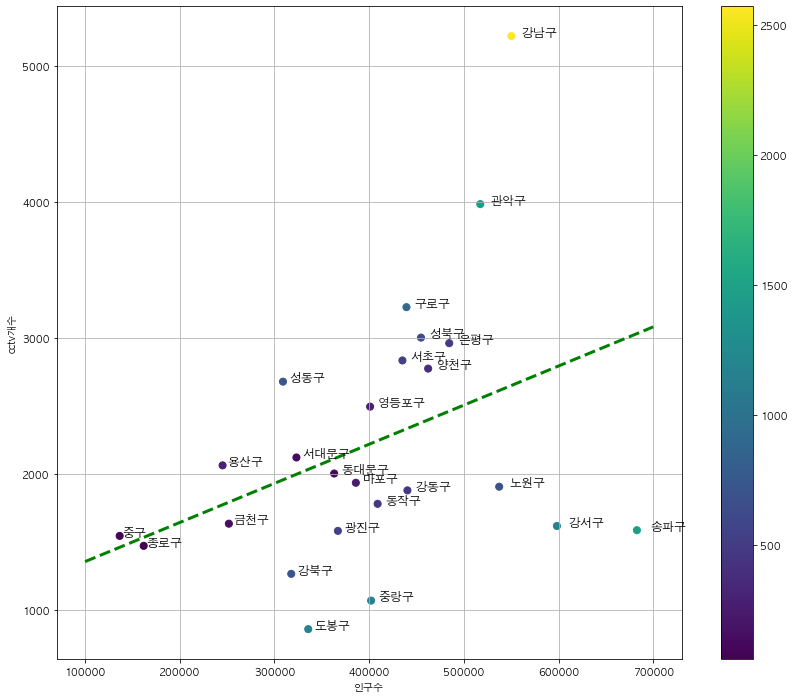

In [71]:
# 11. 산포도의 각 점에 자신의 이름을 표시하고 잔차를 점의 색상으로 설정

# 잔차를 색상으로 표시하고 지역 이름을 점위에 출력 
# 잔차 계산
df['잔차'] = np.abs(df['소계'] - f1(df['계']))
plt.figure(figsize=(14,12))
plt.scatter(df['계'], df['소계'], c=df['잔차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

# 그래프에 텍스트 출력하기
for n in range(25) : 
    # 각 점들의 좌표 우측 
    plt.text(df['계'][n] * 1.02, 
             df['소계'][n] * 1, 
             df.index[n], 
             fontsize=12)

plt.xlabel('인구수')
plt.ylabel('cctv개수')
plt.colorbar()
plt.grid()
plt.show()